In [1]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

In [85]:
import pandas as pd
df=pd.read_excel(r'C:\Users\shaik mahaboob basha\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Train.xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
#Shape Of Dataset

print('Train Data Shape',df.shape)

Train Data Shape (5961, 7)


In [4]:
df.dtypes

Qualification          object
Experience              int64
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                    int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   int64  
 2   Rating              2659 non-null   float64
 3   Place               5936 non-null   object 
 4   Profile             5961 non-null   object 
 5   Miscellaneous_Info  3341 non-null   object 
 6   Fees                5961 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 232.9+ KB


In [6]:
#Columns With Object Data Type
df.select_dtypes(include=['object']).columns

Index(['Qualification', 'Place', 'Profile', 'Miscellaneous_Info'], dtype='object')

In [7]:
#Columns With Int Data Type
df.select_dtypes(include=['int64']).columns

Index(['Experience', 'Fees'], dtype='object')

In [8]:
# check train column types

Column_type = df.dtypes.reset_index()
Column_type.columns = ["Count", "Column Type"]
Column_type.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,1
2,object,4


In [9]:
# Maximum and Minimum number of qualifications

dat_train = df.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the Train dataset is {}\n".format(dat_train.max()))
print("And the qualifications is --> {}\n\n".format(df.Qualification[dat_train.idxmax()]))
print("Minimum qualification of a doctor in the Train dataset is {}\n".format(dat_train.min()))
print("And the qualifications is --> {}\n\n".format(df.Qualification[dat_train.idxmin()]))

Maximum qualifications of a doctor in the Train dataset is 10

And the qualifications is --> Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology


Minimum qualification of a doctor in the Train dataset is 1

And the qualifications is --> BAMS




In [10]:
# Define a function to create a doc of all Qualifications seprataed by ','

from collections import Counter


def doc(series):
    Quals = ''
    for i in series:
        Quals += i + ','
    return Quals

# List of top 10 unique Qualifications along with there occurence in Train Set

text = doc(df.Qualification)
df_train = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df_train.columns=['Qualification','Count']
df_train.head(10)

,Qualification,Count
0,MBBS,2448
1,BDS,1208
2,BAMS,711
3,BHMS,706
4,MBBS,360
5,MS - ENT,340
6,Venereology & Leprosy,297
7,MD - Dermatology,271
8,MD - General Medicine,259
9,Diploma in Otorhinolaryngology (DLO),235


In [86]:
#Removing All NaN From the Dataset For Reducing the Confusion
df. dropna()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
4,BAMS,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
7,BDS,10,0.99,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
12,"BDS, MDS",9,0.98,"Coimbatore Racecourse, Coimbatore",Dentist,"98% 14 Feedback Coimbatore Racecourse, Coimbatore",200
...,...,...,...,...,...,...,...
5953,"MD - Homeopathy, Post Graduate Diploma in Heal...",35,0.92,"Malleswaram, Bangalore",Homeopath,"92% 168 Feedback Malleswaram, Bangalore",100
5956,"MBBS, MS - ENT",19,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5958,MBBS,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


Statistic

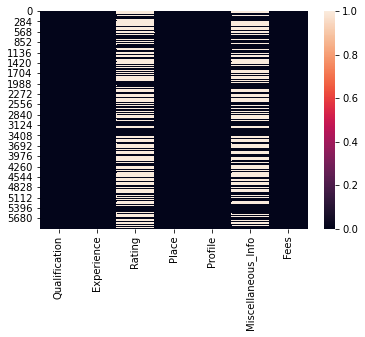

In [12]:
sb.heatmap(df.isnull())

In [13]:
# Train set
df['Rating'].fillna('0%',inplace = True)
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(str)




In [14]:
df['Miscellaneous_Info'].fillna(df['Miscellaneous_Info'].mode(),inplace = True)
df['Miscellaneous_Info'] = df['Miscellaneous_Info'].str.slice(stop=-1).astype(str)


In [15]:
df.describe()

,Experience,Fees
count,5961.000000,5961.000000
mean,17.303976,307.944640
std,11.142798,190.920373
min,0.000000,5.000000
25%,9.000000,150.000000
50%,14.000000,300.000000
75%,23.000000,500.000000
max,66.000000,950.000000


Corelation

In [16]:
dfcor=df.corr()
dfcor

,Experience,Fees
Experience,1.000000,0.002117
Fees,0.002117,1.000000


Univariant Ananlysis

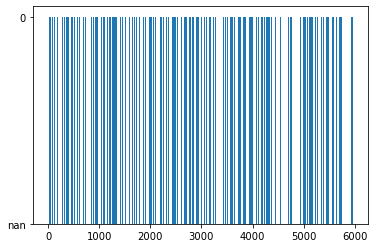

In [17]:
plt.bar(df.index,df['Rating'])
plt.show()

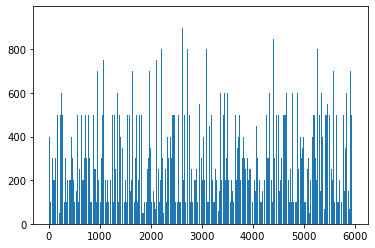

In [18]:
plt.bar(df.index,df['Fees'])
plt.show()

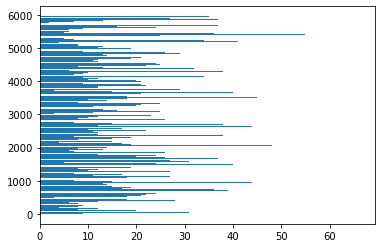

In [19]:
plt.barh(df.index,df['Experience'])
plt.show()

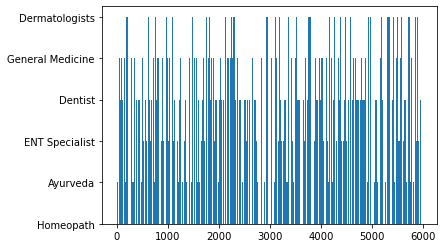

In [20]:
plt.bar(df.index,df['Profile'])
plt.show()

Bi Vaiant Analysis

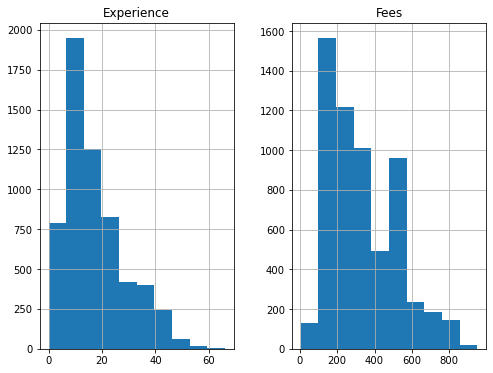

In [24]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca()
df.hist(ax = ax)

import warnings
warnings.filterwarnings('ignore')

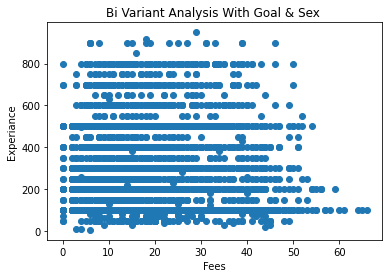

In [31]:
plt.scatter(df["Experience"],df['Fees'])
plt.title("Bi Variant Analysis With Goal & Sex ")
plt.ylabel('Experiance')
plt.xlabel('Fees')
plt.show()

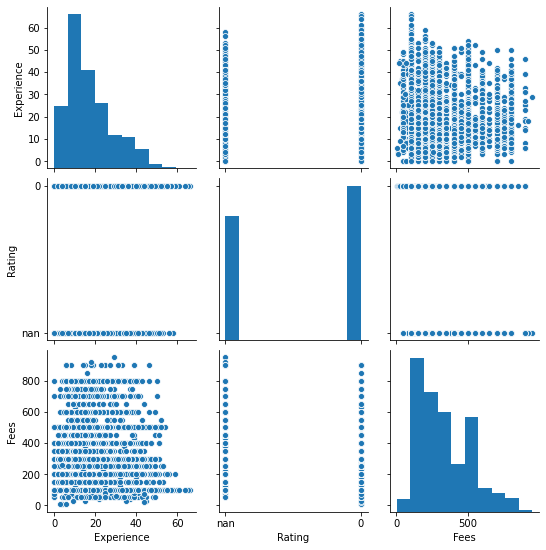

In [33]:
sb.pairplot(df)

Encoding

In [91]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Qualification']=le.fit_transform(df['Qualification'].astype(str))
df['Profile']=le.fit_transform(df['Profile'].astype(str))
df['Place']=le.fit_transform(df['Place'].astype(str))
df['Miscellaneous_Info']=le.fit_transform(df['Miscellaneous_Info'].astype(str))

df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,171,24,1.00,222,5,130,100
1,424,12,0.98,852,0,1422,350
2,845,9,NaN,398,3,2992,300
3,256,12,NaN,645,0,1695,250
4,902,20,1.00,265,0,253,250
...,...,...,...,...,...,...,...
5956,297,19,0.98,668,3,1385,300
5957,436,33,NaN,492,4,2992,100
5958,436,41,0.97,131,4,1173,600
5959,756,15,0.90,835,4,2202,100


In [92]:
df.dropna()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,171,24,1.00,222,5,130,100
1,424,12,0.98,852,0,1422,350
4,902,20,1.00,265,0,253,250
7,1125,10,0.99,257,1,1943,200
12,1318,9,0.98,37,1,1313,200
...,...,...,...,...,...,...,...
5953,1034,35,0.92,378,5,758,100
5956,297,19,0.98,668,3,1385,300
5958,436,41,0.97,131,4,1173,600
5959,756,15,0.90,835,4,2202,100


Assigning Values

In [108]:
x=df.drop('Fees', axis = 1)
x['Rating'].fillna(x['Rating'].mode()[0],inplace=True)
x

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,171,24,1.00,222,5,130
1,424,12,0.98,852,0,1422
2,845,9,1.00,398,3,2992
3,256,12,1.00,645,0,1695
4,902,20,1.00,265,0,253
...,...,...,...,...,...,...
5956,297,19,0.98,668,3,1385
5957,436,33,1.00,492,4,2992
5958,436,41,0.97,131,4,1173
5959,756,15,0.90,835,4,2202


In [109]:
y=df['Fees']
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

Checking The Outliers

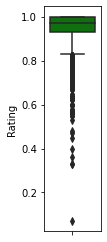

In [110]:
collist=df.select_dtypes(include=['float']).columns
ncol=10
nrows=9
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Checking The Skewness

In [111]:
round(df.skew(),2)

Qualification        -0.04
Experience            0.99
Rating               -3.28
Place                 0.05
Profile               0.11
Miscellaneous_Info   -0.82
Fees                  0.75
dtype: float64

Experiance and Miscellaneous Having Skewness above +/- .55

In [112]:
#treating the skewness with Square and Cube Root Method

df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<0.55:
            df[col]=np.cbrt(df[col])

In [113]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(5961, 7)

In [49]:
loss_percentage=(5961-5759)/5961*100
print (round(loss_percentage,2),"%")

3.39 %


Transforming To Remove Skewness

In [115]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.30668777,  0.73735682,  0.64505517, -0.78387018,  1.42055919,
        -1.92262707],
       [-0.56095039, -0.32517958, -0.61214308,  1.46420142, -1.64414533,
        -0.90730769],
       [ 0.42987521, -0.68837382,  0.64505517, -0.05140631,  0.41883046,
         0.87614636],
       ...,
       [-0.52955001,  1.76899411, -1.0136315 , -1.23673919,  0.94015599,
        -1.14612922],
       [ 0.23546908, -0.0134478 , -2.03206357,  1.4131455 ,  0.94015599,
        -0.07403328],
       [ 1.48053057,  0.17358896,  0.64505517,  0.53638852, -0.82224914,
        -0.73296428]])

In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[-1.30668777,  0.73735682,  0.64505517, -0.78387018,  1.42055919,
        -1.92262707],
       [-0.56095039, -0.32517958, -0.61214308,  1.46420142, -1.64414533,
        -0.90730769],
       [ 0.42987521, -0.68837382,  0.64505517, -0.05140631,  0.41883046,
         0.87614636],
       ...,
       [-0.52955001,  1.76899411, -1.0136315 , -1.23673919,  0.94015599,
        -1.14612922],
       [ 0.23546908, -0.0134478 , -2.03206357,  1.4131455 ,  0.94015599,
        -0.07403328],
       [ 1.48053057,  0.17358896,  0.64505517,  0.53638852, -0.82224914,
        -0.73296428]])

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [118]:
max_scr=0
for i in range(0,6000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random State",i,". The Model Is Performing Very Well")
        print("At Random State:-",i)
        print("Training r2_score is",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is",r2_score(y_test,pred_test)*100)

At Random State 150 . The Model Is Performing Very Well
At Random State:- 150
Training r2_score is 6.852625715941219
Testing r2_score is 6.8508844771069555
At Random State 388 . The Model Is Performing Very Well
At Random State:- 388
Training r2_score is 6.870246757256782
Testing r2_score is 6.868773151425788
At Random State 947 . The Model Is Performing Very Well
At Random State:- 947
Training r2_score is 6.808171510113336
Testing r2_score is 6.807260592938224
At Random State 2652 . The Model Is Performing Very Well
At Random State:- 2652
Training r2_score is 6.843191256766145
Testing r2_score is 6.840874139186848
At Random State 2789 . The Model Is Performing Very Well
At Random State:- 2789
Training r2_score is 6.824826006768891
Testing r2_score is 6.816982783834447
At Random State 2843 . The Model Is Performing Very Well
At Random State:- 2843
Training r2_score is 6.774698735393692
Testing r2_score is 6.7701709664309995
At Random State 2919 . The Model Is Performing Very Well
At Ra

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=2789) #Random state = 2789

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Regularisation

Lasso

In [121]:
from sklearn.linear_model import Lasso
parameters ={'alpha':[.00001,.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [122]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",lsc*100)
    print ("R2_score is :-",lss*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- 6.783800255438704
R2_score is :- 6.820282704965974


At CV :- 3
Cross Validation Score is :- 6.66207696000286
R2_score is :- 6.820282704965974


At CV :- 4
Cross Validation Score is :- 6.650239604044769
R2_score is :- 6.820282704965974


At CV :- 5
Cross Validation Score is :- 6.559080270283006
R2_score is :- 6.820282704965974


At CV :- 6
Cross Validation Score is :- 6.540197436918353
R2_score is :- 6.820282704965974


At CV :- 7
Cross Validation Score is :- 6.562320816993507
R2_score is :- 6.820282704965974


At CV :- 8
Cross Validation Score is :- 6.607563167268611
R2_score is :- 6.820282704965974


At CV :- 9
Cross Validation Score is :- 6.463497168549109
R2_score is :- 6.820282704965974




In [123]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 145.14630067901328
Mean Square Error: 31666.876523942567
Root Mean Sqaured Error: 177.95189384758615


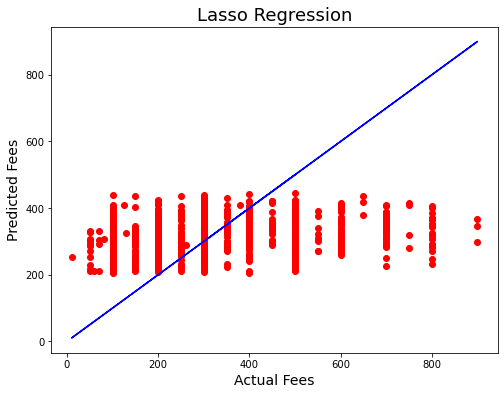

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Fees',fontsize=14)
plt.ylabel('Predicted Fees',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

Ridge Regression

In [126]:
from sklearn.linear_model import Ridge
parameters ={'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'random_state':[1,2,3,4,5,6,7,8,9]}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'random_state': 1}


In [127]:
ridge=Ridge(alpha=0.01,random_state=1,fit_intercept=True,normalize= True)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdd=r2_score(y_test,pred_rd)
for j in range(2,10):
    rdscore = cross_val_score(rd,x_t,y,cv=j)
    rdc=rdscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",rdc*100)
    print ("R2_score is :-",rdc*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- 6.783980290806407
R2_score is :- 6.783980290806407


At CV :- 3
Cross Validation Score is :- 6.6620536315932855
R2_score is :- 6.6620536315932855


At CV :- 4
Cross Validation Score is :- 6.647233601066905
R2_score is :- 6.647233601066905


At CV :- 5
Cross Validation Score is :- 6.557857692498614
R2_score is :- 6.557857692498614


At CV :- 6
Cross Validation Score is :- 6.54025242207976
R2_score is :- 6.54025242207976


At CV :- 7
Cross Validation Score is :- 6.562285126897234
R2_score is :- 6.562285126897234


At CV :- 8
Cross Validation Score is :- 6.607056009028471
R2_score is :- 6.607056009028471


At CV :- 9
Cross Validation Score is :- 6.463491357432706
R2_score is :- 6.463491357432706




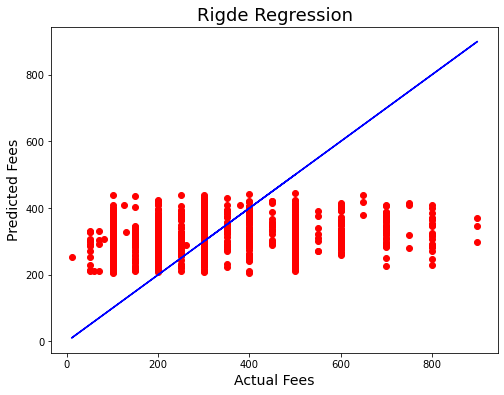

In [129]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Fees',fontsize=14)
plt.ylabel('Predicted Fees',fontsize=14)
plt.title('Rigde Regression',fontsize=18)
plt.show()

In [130]:
#Ensemblier Technique
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'mse', 'splitter': 'best'}


In [131]:
dt=DecisionTreeRegressor(criterion='mse', splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print("r2_score:",dts*100)
dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

r2_score: -82.4902412994272
Cross Val Score: -63.7406574597606


In [132]:
print("Error:")
print("Mean Absolute Error:",round(mean_absolute_error(y_test,pred_decision),2))
print("Mean Square Error:",round(mean_squared_error(y_test,pred_decision),2))
print("Root Mean Sqaured Error:",round(np.sqrt(mean_squared_error(y_test,pred_decision)),2))

Error:
Mean Absolute Error: 182.08
Mean Square Error: 62018.82
Root Mean Sqaured Error: 249.04


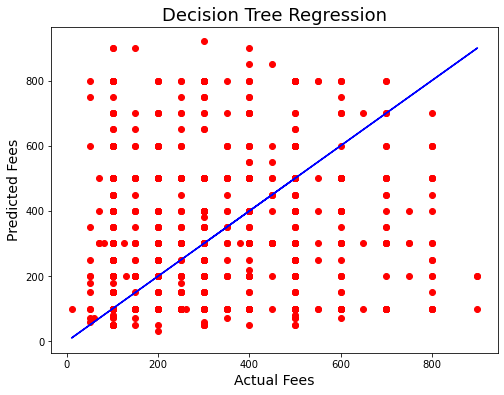

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Fees',fontsize=14)
plt.ylabel('Predicted Fees',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

Most of the datapoints are lying outside the pridected line

In [135]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'mse', 'n_estimators': 200}


In [136]:
rf=RandomForestRegressor(criterion='mse', n_estimators= 200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rd=rf.predict(x_test)
rfs=r2_score(y_test,pred_rd)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

r2_score: 11.594994871110842
Cross Val Score: 15.833991795965296


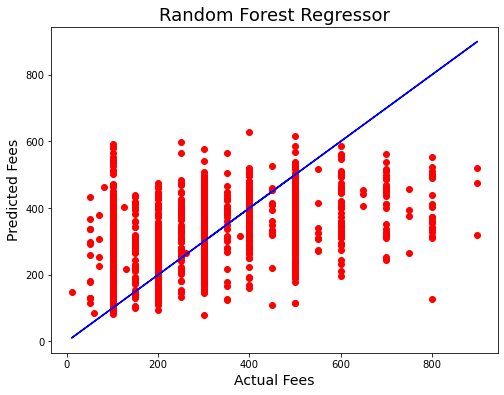

In [138]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Fees',fontsize=14)
plt.ylabel('Predicted Fees',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

Max Data Points are far away from the predicted line

Gredient Boosting Regressor

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 100}


In [140]:
gbr=GradientBoostingRegressor(criterion='mse', loss='ls',n_estimators=100)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_random=gbr.predict(x_test)
gbrs=r2_score(y_test,pred_random)
print("r2_score:",round(gbrs*100,2))
gbscore = cross_val_score(gbr,x_t,y,cv=3)
gbrc=gbscore.mean()
print('Cross Val Score:',round(gbrc*100,2))

r2_score: 19.51
Cross Val Score: 18.56


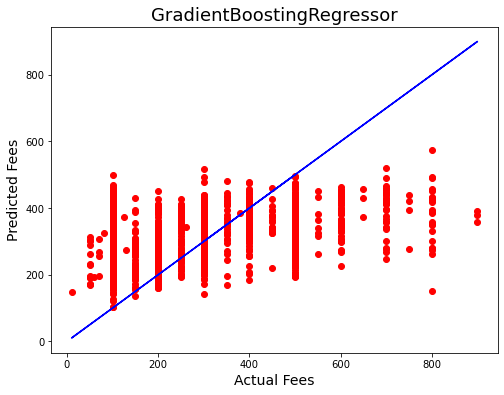

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_random,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Fees',fontsize=14)
plt.ylabel('Predicted Fees',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

Datapoints are in line with predicted line but major data is seen outside the predicted line

In [142]:
from sklearn.svm import SVR
parameters = {'kernel':['linear','poly','rbf','sigmoid']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'rbf'}


In [143]:
sv=SVR(kernel='rbf',gamma='auto')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_vector)
print("r2_score:",round(svs*100,2))
svscore = cross_val_score(sv,x_t,y,cv=3)
svc=svscore.mean()
print('Cross Val Score:',round(svc*100,2))


r2_score: 7.2
Cross Val Score: 4.51


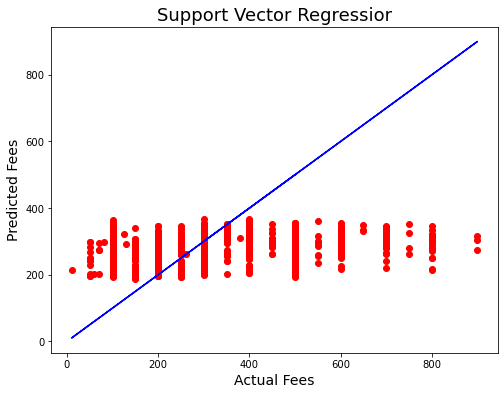

In [145]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_vector,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Fees',fontsize=14)
plt.ylabel('Predicted Fees',fontsize=14)
plt.title('Support Vector Regressior',fontsize=18)
plt.show()

In [147]:
import pickle
filename='FeePridication_Project13.pkl'
pickle.dump(rd,open(filename,'wb'))